# Future changes of PE for different storm types 

In [12]:
import xarray as xr 
import pandas as pd
import numpy as np
from pathlib import Path 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs 
from netCDF4 import Dataset
module_path = '/glade/work/kukulies/pe_conus404/conus404/scripts/'
if module_path not in sys.path:
    sys.path.append(module_path) 
import utils
from utils import get_bulk_PE, get_bulk_pe_iwp

### Tropical cyclones

In [13]:
tcs = list(Path('/glade/campaign/mmm/c3we/CPTP_kukulies/conus404/hurricane_stats/').glob('*hist*csv'))
tcs.sort() 

tcs_pgw = list(Path('/glade/campaign/mmm/c3we/CPTP_kukulies/conus404/hurricane_stats/').glob('*PGW*csv'))
tcs_pgw.sort() 

print(len(tcs), 'TC cases in CONUS404 historical', len(tcs_pgw), 'TC case in CONUS404 PGW') 

34 TC cases in CONUS404 historical 29 TC case in CONUS404 PGW


In [110]:
# derive bulk PE (average PE over entire lifetime, so all features saved in one file) 

tc_hist = np.array(())
group =  None 

for fname in tcs:
    tc = pd.read_csv(fname)
    tc_PE = get_bulk_PE(tc, group = group) 
    tc_hist = np.append(tc_hist, tc_PE) 
    
print('sample size of the present-climate distribution:', tc_hist.size)

tc_pgw = np.array(())

for fname in tcs_pgw:
    tc = pd.read_csv(fname)
    tc_PE = get_bulk_PE(tc, group = group) 
    tc_pgw = np.append(tc_pgw, tc_PE) 
    
print('sample size of the future-climate distribution:', tc_pgw.size)

sample size of the present-climate distribution: 34
sample size of the future-climate distribution: 29


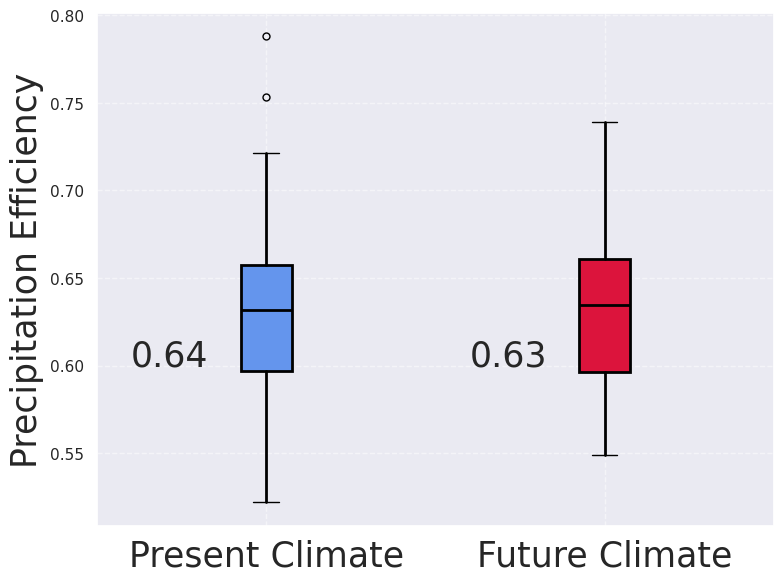

In [97]:
import seaborn as sns 
sns.set()

fig, ax = plt.subplots(figsize=(8, 6))
fs = 25

b = ax.boxplot([tc_hist, tc_pgw], 
               positions=[1, 2],  # positions on x-axis
               patch_artist=True,  # Fill the boxes with color
               whiskerprops=dict(color='black', linewidth=2),  # Customize whiskers
               flierprops=dict(marker='o', color='red', markersize=5),  # Outliers customization
               medianprops=dict(color='black', linewidth=2),  # Median line color
               showfliers=True)  # Show the outliers

colors = ['cornflowerblue', 'crimson']
for i, box in enumerate(b['boxes']):
    box.set_facecolor(colors[i])  # Set the fill color for each box
    box.set_edgecolor('black')    # Set the border color to black
    box.set_linewidth(2)         # Set the border width


ax.set_xticks([1, 2])
ax.set_xticklabels(['Present Climate', 'Future Climate'], fontsize = fs )

ax.text(0.6, 0.6,  str(np.round(np.mean(tc_hist), decimals = 2)), fontsize = fs )
ax.text(1.6, 0.6, str( np.round(np.mean(tc_pgw), decimals = 2)) , fontsize = fs)


# Customize the y-axis label
ax.set_ylabel('Precipitation Efficiency', fontsize = fs )

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('future_change_bulk_pe_tc.png', bbox_inches = 'tight') 
plt.show()

## Compare to IWP-derived PE 

In [111]:
tc_hist_iwp = np.array(())
group =  None

for fname in tcs:
    tc = pd.read_csv(fname)
    tc_PE = get_bulk_pe_iwp(tc, group = group) 
    tc_hist_iwp = np.append(tc_hist_iwp, tc_PE) 
    
print('sample size of the present-climate distribution:', tc_hist_iwp.size)

tc_pgw_iwp = np.array(())

for fname in tcs_pgw:
    tc = pd.read_csv(fname)
    tc_PE = get_bulk_pe_iwp(tc, group = group) 
    tc_pgw_iwp = np.append(tc_pgw_iwp, tc_PE) 
    
print('sample size of the future-climate distribution:', tc_pgw_iwp.size)

sample size of the present-climate distribution: 34
sample size of the future-climate distribution: 29


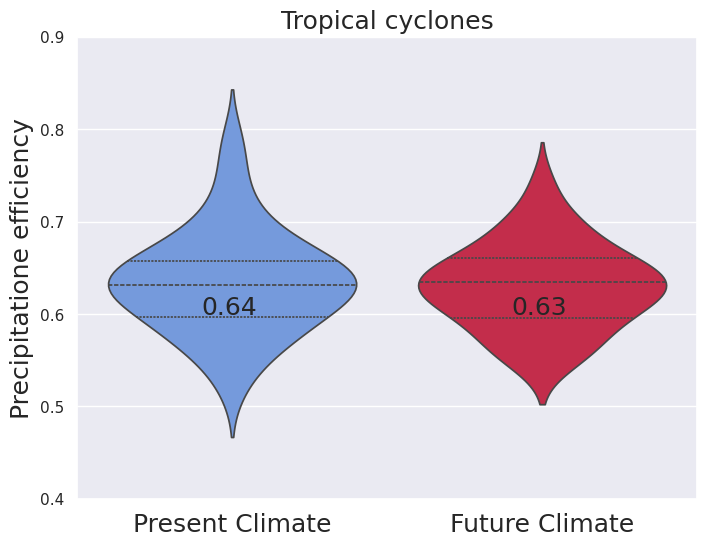

In [133]:
plt.figure(figsize= (8, 6))

fs = 18 

plt.subplot(1,1,1)
ax = sns.violinplot(data=[tc_hist, tc_pgw], inner='quart', palette = ['cornflowerblue', 'crimson'])
ax.set_title('Tropical cyclones', fontsize = fs)

ax.set_ylabel('Precipitatione efficiency', fontsize = fs )
ax.set_xticks([0, 1])
ax.set_xticklabels(['Present Climate', 'Future Climate'], fontsize = fs )

ax.set_ylim(0.4,0.9)
ax.text(0 - 0.1, 0.6,  str(np.round(np.mean(tc_hist), decimals = 2)), fontsize = fs )
ax.text(1 - 0.1, 0.6, str( np.round(np.mean(tc_pgw), decimals = 2)) , fontsize = fs)

plt.savefig('figures/violin_pe_future_vs_present_tc.png', bbox_inches = 'tight')
plt.show()

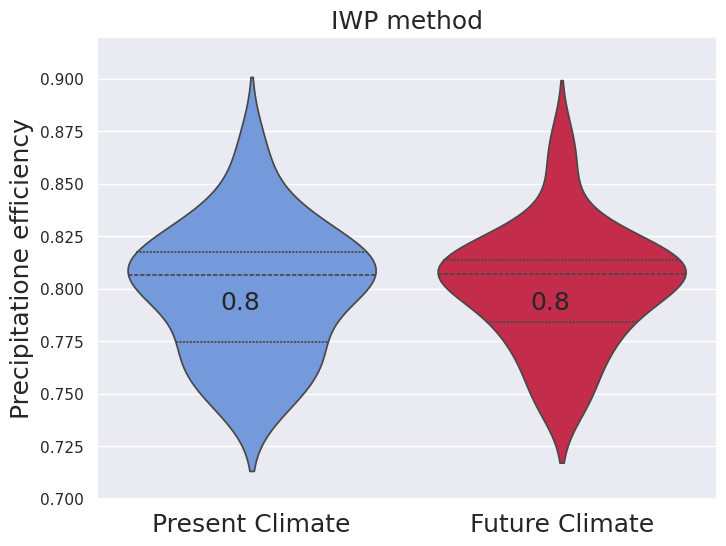

In [131]:
plt.figure(figsize= (8, 6)) 

plt.subplot(1,1,1)
ax = sns.violinplot(data=[tc_hist_iwp, tc_pgw_iwp], inner='quart', palette = ['cornflowerblue', 'crimson'])
ax.set_title('IWP method', fontsize = fs )

ax.set_ylabel('Precipitatione efficiency', fontsize = fs )
ax.set_xticks([0, 1])
ax.set_xticklabels(['Present Climate', 'Future Climate'], fontsize = fs )

ax.set_ylim(0.7,0.92)
ax.text(0 - 0.1, 0.79,  str(np.round(np.mean(tc_hist_iwp), decimals = 2)), fontsize = fs )
ax.text(1 - 0.1, 0.79, str( np.round(np.mean(tc_pgw_iwp), decimals = 2)) , fontsize = fs)

plt.savefig('figures/violin_pe_future_vs_present_tc_iwpmethod.png', bbox_inches = 'tight')
plt.show()

### Are the distributions significantly different? 

- no significant difference when we look at the bulk PE averaged over lifetime, but slight decrease when we look at each feature individually 

In [65]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(tc_hist, tc_pgw, alternative='two-sided')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}") 

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the distributions.")


U-statistic: 10350339.0
P-value: 1.6355463891243289e-07
Reject the null hypothesis: The distributions are significantly different.


In [132]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(tc_hist_iwp, tc_pgw_iwp, alternative='two-sided')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}") 

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the distributions.")


U-statistic: 483.0
P-value: 0.8957718502251428
Fail to reject the null hypothesis: No significant difference between the distributions.


### Mesoscale convective systems

In [136]:
storm_path = Path('/glade/campaign/mmm/c3we/CPTP_kukulies/conus404/tracked_storms/') 
mcs_files = list(storm_path.glob('features_iwp*nc'))
mcs_files.sort()


future_path = Path('/glade/campaign/mmm/c3we/CPTP_kukulies/conus404/tracked_storms_pgw/') 
mcs_pgw_files = list(future_path.glob('tobac_storm_tracks_????_??_pgw.nc'))
mcs_pgw_files.sort()

print(len(mcs_files), len(mcs_pgw_files))

273 234


In [138]:
mcs_hist = np.array(())
group =  'track' 

for fname in mcs_files:
    tobac = xr.open_dataset(fname).to_dataframe()
    mcs = tobac[tobac.mcs_flag == True]
    #multicell = tobac[tobac.mcs_flag == False]
    mcs_PE = get_bulk_PE(mcs, group = 'track')
    mcs_hist = np.append(mcs_hist, mcs_PE) 
    
print('sample size of the present-climate distribution:', mcs_hist.size)

sample size of the present-climate distribution: 16053


In [139]:
mcs_pgw = np.array(())
group =  'track' 

for fname in mcs_pgw_files:
    tobac = xr.open_dataset(fname).to_dataframe()
    mcs = tobac[tobac.mcs_flag == True]
    #multicell = tobac[tobac.mcs_flag == False]
    mcs_PE = get_bulk_PE(mcs, group = 'track')
    mcs_pgw = np.append(mcs_pgw, mcs_PE) 
    
print('sample size of the future-climate distribution:', mcs_pgw.size)

sample size of the future-climate distribution: 15332


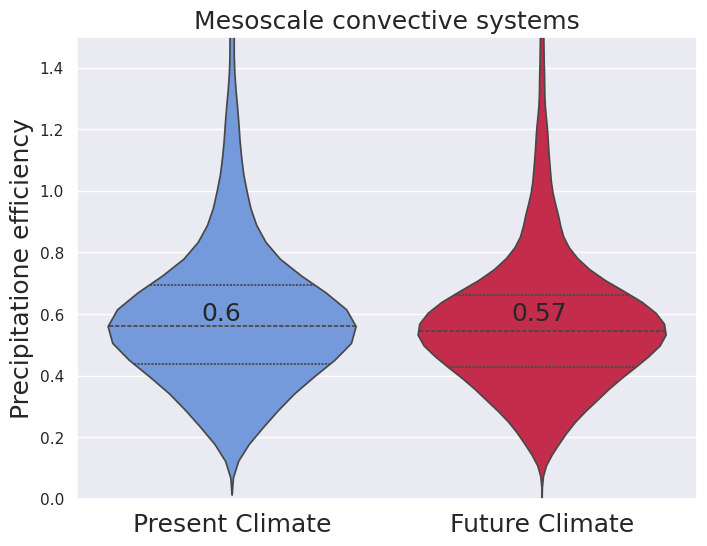

In [148]:
plt.figure(figsize= (8, 6))

fs = 18 
plt.subplot(1,1,1)
ax = sns.violinplot(data=[mcs_hist, mcs_pgw], inner='quart', palette = ['cornflowerblue', 'crimson'])
ax.set_title('Mesoscale convective systems', fontsize = fs)

ax.set_ylabel('Precipitatione efficiency', fontsize = fs )
ax.set_xticks([0, 1])
ax.set_xticklabels(['Present Climate', 'Future Climate'], fontsize = fs )

ax.set_ylim(0,1.5)
ax.text(0 - 0.1, 0.58,  str(np.round(np.mean(mcs_hist), decimals = 2)), fontsize = fs )
ax.text(1 - 0.1, 0.58, str( np.round(np.mean(mcs_pgw), decimals = 2)) , fontsize = fs)

plt.savefig('figures/violin_pe_future_vs_present_mcs.png', bbox_inches = 'tight')
plt.show()

In [146]:

stat, p_value = mannwhitneyu(mcs_hist, mcs_pgw, alternative='two-sided')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}") 

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the distributions.")


U-statistic: 129501532.0
P-value: 1.010036497376829e-15
Reject the null hypothesis: The distributions are significantly different.


### Comparison to IWP-derived method 

In [149]:
mcs_hist_iwp = np.array(())
group =  'track' 

for fname in mcs_files:
    tobac = xr.open_dataset(fname).to_dataframe()
    mcs = tobac[tobac.mcs_flag == True]
    #multicell = tobac[tobac.mcs_flag == False]
    mcs_PE = get_bulk_pe_iwp(mcs, group = 'track')
    mcs_hist_iwp = np.append(mcs_hist_iwp, mcs_PE) 
print('sample size of the present-climate distribution:', mcs_hist_iwp.size)

sample size of the present-climate distribution: 16053


In [150]:
mcs_pgw_iwp = np.array(())
group =  'track' 

for fname in mcs_pgw_files:
    tobac = xr.open_dataset(fname).to_dataframe()
    mcs = tobac[tobac.mcs_flag == True]
    #multicell = tobac[tobac.mcs_flag == False]
    mcs_PE = get_bulk_PE(mcs, group = 'track')
    mcs_pgw_iwp = np.append(mcs_pgw_iwp, mcs_PE) 
    
print('sample size of the future-climate distribution:', mcs_pgw_iwp.size)

sample size of the future-climate distribution: 15332


In [151]:

stat, p_value = mannwhitneyu(mcs_hist_iwp, mcs_pgw_iwp, alternative='two-sided')
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}") 

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: The distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the distributions.")


U-statistic: 128717042.0
P-value: 1.8167396523865794e-12
Reject the null hypothesis: The distributions are significantly different.


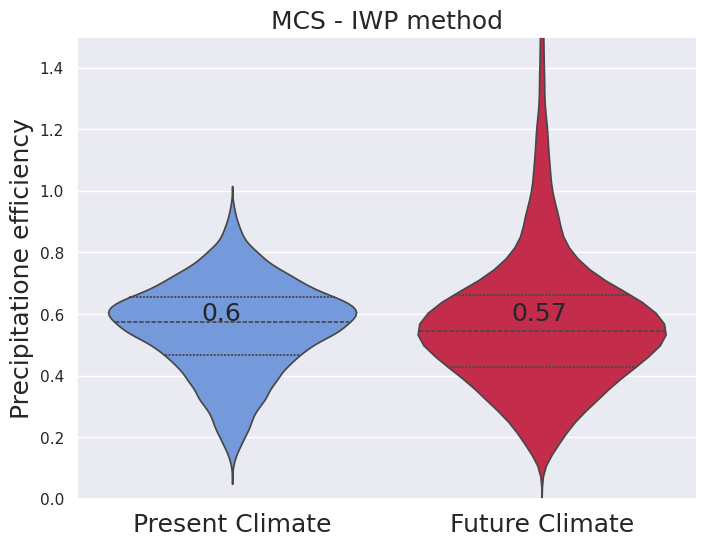

In [152]:
plt.figure(figsize= (8, 6))

fs = 18 

plt.subplot(1,1,1)
ax = sns.violinplot(data=[mcs_hist_iwp, mcs_pgw_iwp], inner='quart', palette = ['cornflowerblue', 'crimson'])
ax.set_title('MCS - IWP method', fontsize = fs)

ax.set_ylabel('Precipitatione efficiency', fontsize = fs )
ax.set_xticks([0, 1])
ax.set_xticklabels(['Present Climate', 'Future Climate'], fontsize = fs )

ax.set_ylim(0,1.5)
ax.text(0 - 0.1, 0.58,  str(np.round(np.mean(mcs_hist), decimals = 2)), fontsize = fs )
ax.text(1 - 0.1, 0.58, str( np.round(np.mean(mcs_pgw), decimals = 2)) , fontsize = fs)

plt.savefig('figures/violin_pe_future_vs_present_mcs_iwpmethod.png', bbox_inches = 'tight')
plt.show()